In [2]:
# Testing Pacman
import postprocess as pp
import plots as plots


postproc


In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [237]:
_omega = np.deg2rad(45)
ω = _omega /2 
parameters = {
    "material": 
    {"E": 1., "ν": 0.}
}
tdim = 2
radius = 1.

In [238]:
_n = 30
x = np.zeros((tdim, _n))
_omegas = np.linspace(-np.pi+_omega / 2, +np.pi-_omega / 2, _n)
x[0] = [radius * np.cos(t) for t in _omegas] 
x[1] = [radius * np.sin(t) for t in _omegas] 

In [240]:
from sympy import nsolve, pi, sin, cos, pi, symbols
λ = singularity_exp(ω)
Θ = symbols('Θ')
_E = parameters['material']['E']
ν = parameters['material']['ν']
Θv = np.arctan2(x[1], x[0])

coeff = ( (1+λ) * sin( (1+λ) * (pi - ω) ) ) / ( (1-λ) * sin( (1-λ) * (pi - ω) ) )

_f = (2*np.pi)**(λ - 1) * ( cos( (1+λ) * Θ) - coeff * cos((1-λ) * Θ) ) / (1-coeff)

f = sp.lambdify(Θ, _f, "numpy")
fp = sp.lambdify(Θ, sp.diff(_f, Θ, 1), "numpy")
fpp = sp.lambdify(Θ, sp.diff(_f, Θ, 2), "numpy")
fppp = sp.lambdify(Θ, sp.diff(_f, Θ, 3), "numpy")

print("F(0)", f(0))
print("F'(0)", fp(0))
print("F''(0)", fpp(0))
print("F'''(0)", fppp(0))

r = np.sqrt(x[0]**2. + x[1]**2.)
_c1 = (λ+1)*(1- ν*λ - ν**2.*(λ+1))
_c2 = 1-ν**2.
_c3 = 2.*(1+ν)*λ**2. + _c1
_c4 = _c2
_c5 = λ**2. * (1-λ**2.)

ur = ( r**λ / _E * (_c1*f(Θv) + _c2*fpp(Θv)) ) / _c5
uΘ = ( r**λ / _E * (_c3*fp(Θv) + _c4*fppp(Θv)) ) / _c5

values = np.zeros((tdim, x.shape[1]))
values[0] = ur * np.cos(Θv) - uΘ * np.sin(Θv)
values[1] = ur * np.sin(Θv) + uΘ * np.cos(Θv)


F(0) 0.40263238776858223
F'(0) -0.0
F''(0) -0.3240471537263443
F'''(0) 0.0


(0.0, 90.0)

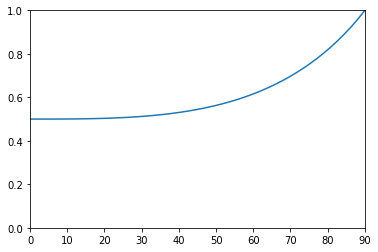

In [46]:
plt.plot(
    np.rad2deg(np.linspace(0, np.pi/2)),
    [singularity_exp(t) for t in np.linspace(0, np.pi/2)]
    )
plt.ylim((0., 1.))
plt.xlim((0., 90.))

In [50]:
# Council tax requested vs. available cash
# (at the time)
1400/3000
# 1400/4000



0.4666666666666667

In [51]:
# 50/1400
50/3000

0.016666666666666666

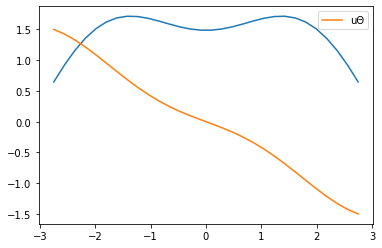

In [79]:
plt.plot(_omegas, ur)
plt.plot(_omegas, uΘ, label='uΘ')
plt.legend()

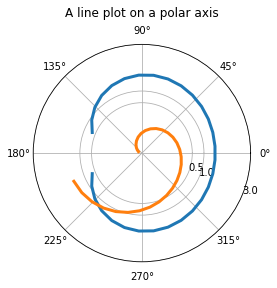

In [236]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# ax.plot(_omegas, r, lw=10)
ax.plot(_omegas, ur, lw=3)
ax.plot(_omegas, uΘ, lw=3)
ax.set_rmax(1.)
ax.set_rticks([0.5, 1, 3])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [114]:
u1, u2= (np.vstack([values[0], values[1]]))

In [146]:
_circxs = np.zeros_like(values)

_circxs[0] = np.cos(Θv)
_circxs[1] = np.sin(Θv)

# _origin = (np.vstack([values[0], values[1]]))


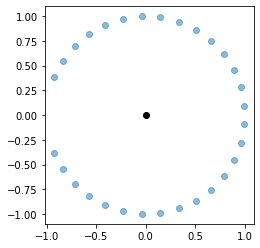

In [142]:
plt.scatter(_circxs[0], _circxs[1], alpha=0.5)
plt.scatter(0, 0, alpha=1, c='k')
plt.gca().set_aspect(1)


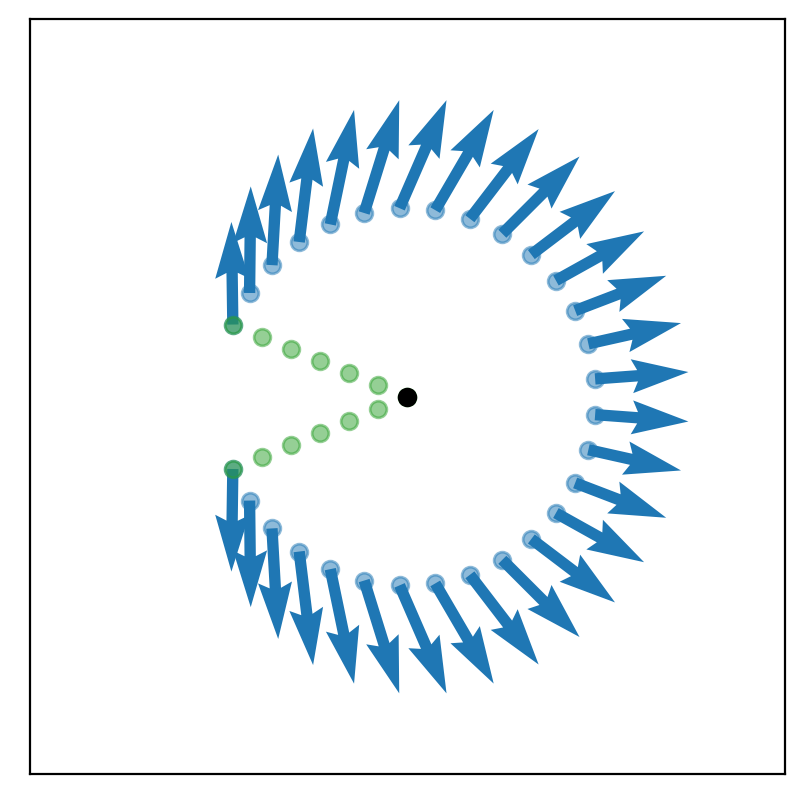

In [233]:
X, Y = np.meshgrid(_circxs[0], _circxs[1])
U = X + Y
V = Y - X

# fig, ax = plt.subplots()

fig = plt.figure(figsize=(5, 5), dpi=200)
ax = fig.gca()
ax.quiver(_circxs[0], _circxs[1],
        values[0], values[1],
        color="C0", angles='xy',
          scale_units='xy', scale=3, width=.015)

ax.set(xlim=(-2, 2), ylim=(-2, 2))

plt.scatter(_circxs[0], _circxs[1], alpha=0.5)
plt.scatter( [ i*np.cos( _omegas[0]) for i in np.linspace(0., 1., 7)],
      [ i*np.sin(- np.pi + _omegas[0]) for i in np.linspace(0., 1., 7)], alpha=0.5,
      c='C2')
plt.scatter( [ i*np.cos( _omegas[-1]) for i in np.linspace(0., 1., 7)],
      [ i*np.sin(- np.pi + _omegas[-1]) for i in np.linspace(0., 1., 7)], alpha=0.5,
      c='C2')
plt.scatter(0, 0, alpha=1, c='k')
plt.gca().set_aspect(1)

# plt.tick_params(
#     axis='both',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     right=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False) # labels along the

plt.xticks([]),plt.yticks([])

plt.show()



$$b \leftarrow  b - \text{scale} * A_j (g_j - x_{0_j})$$


$$
\begin{align}
J_F(x_k)\delta x_k &= - F(x_k)\\
x_{k+1} &= x_k + \delta x_k
\end{align}
$$

 $x_{k+1}\vert_{bc}= u_D$

$$
\delta x_k\vert_{bc} = u_D-x_k\vert_{bc}
$$

$b - J(u_D-u_{(i-1)})$

### Extended phase space

In [6]:
experiment = '../../practice/output/pacman'
params, data, signature = pp.load_data(experiment)


no sig file found


In [5]:
data

,it,AM_F_alpha_H1,AM_Fnorm,NE_Fnorm,load,fracture_energy,elastic_energy,total_energy,solver_data,rate_12_norm,rate_12_norm_unscaled
0,0,0.000000,0.280134,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
1,1,0.000000,0.283649,9.107092e-17,0.005051,0.000000,0.000042,0.000042,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
2,2,0.000000,0.287115,5.884591e-17,0.010101,0.000000,0.000167,0.000167,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
3,3,0.000000,0.290533,9.573305e-17,0.015152,0.000000,0.000376,0.000376,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
4,4,0.000000,0.293906,9.878739e-17,0.020202,0.000000,0.000669,0.000669,"{'iteration': [1], 'error_alpha_L2': [0.0], 'e...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.000950,0.438617,5.472526e-10,0.479798,0.142038,0.192914,0.334952,"{'iteration': [3], 'error_alpha_L2': [0.001973...",0.013641,0.110963
96,96,0.000978,0.438669,4.759147e-10,0.484848,0.145475,0.193524,0.338998,"{'iteration': [3], 'error_alpha_L2': [0.001870...",0.012484,0.101166
97,97,0.000928,0.438728,6.066927e-10,0.489899,0.148924,0.194092,0.343015,"{'iteration': [3], 'error_alpha_L2': [0.001838...",0.012571,0.102072
98,98,0.000969,0.438754,2.920623e-09,0.494949,0.152539,0.194462,0.347001,"{'iteration': [3], 'error_alpha_L2': [0.001829...",0.013182,0.107372


In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
s0 = []
_dt = (params.get("loading").get("max") - params.get("loading").get("min")) /params.get("loading").get("steps")
for i, t in enumerate(data.get("load")):
    s0.append(np.trapz(data.get("rate_12_norm")[0:i], data.get("load")[0:i])/_dt)
    
s = data.get("load") + s0

In [29]:
len(data.get("load"))

100

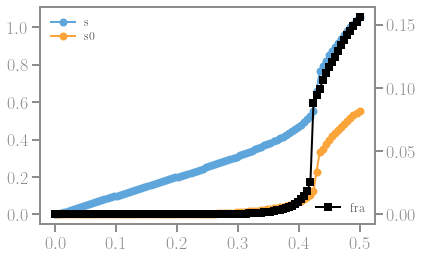

In [30]:
plt.plot(data.get("load"), s, marker = 'o', label='s')
plt.plot(data.get("load"), s0, marker = 'o', label='s0')
plt.legend()
plt.twinx()
plt.plot(data.get("load"), data.get("fracture_energy"), marker = 's', c='k', label='fra')
plt.legend(loc=4)
plt.savefig(f'pacman_jump-{len(data.get("load"))}-ts.pdf')

In [56]:
s

4.224996386300475

In [4]:
experiment = '../../practice/output/pacman_embedded'
params, data, signature = pp.load_data(experiment)


KeyError: 'load'